In [1]:
import numpy as np 
import matplotlib
# Forces the non-interactive backend designed for file output
matplotlib.use('Agg') 
%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator
import pandas as pd
import math

#Color palette
colors = [
    '#000000',  # Black
    '#E69F00',  # Orange
    '#56B4E9',  # Sky Blue
    '#009E73',  # Bluish Green
    '#F0E442',  # Yellow
    'purple',  # Blue
    '#D55E00',  # Vermilion
]

# Style settings
# --- Corrected rcParams Block ---
plt.rcParams.update({
    ## Text and Font Settings
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "axes.labelsize": 25,
    "font.size": 16,
    "legend.fontsize": 16,
    "text.latex.preamble": r"\usepackage{amsmath}",

    ## Tick Settings
    "xtick.labelsize": 22,
    "ytick.labelsize": 22,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.top": True,
    "ytick.right": True,
    "xtick.major.size": 8,
    "ytick.major.size": 8,
    "xtick.minor.size": 4,
    "ytick.minor.size": 4,
    
    ## Axes Line Width (for a bolder border)
    "axes.linewidth": 1.5,
    
    ## Turn the default grid OFF in rcParams
    "axes.grid": False,
})

In [2]:
# Load data
dir = "../data" # Directory containing data files
plot_dir = "../image/plot"
input_noise = pd.read_csv(f"{dir}/Noise_sim_postlayout.csv")
gain = pd.read_csv(f"{dir}/Gain_mag_phase.csv")
drift = pd.read_csv(f"{dir}/gain_drift.csv")
gain_test = pd.read_csv(f"{dir}/CMRR_test.csv")
                        

## Input noise plot 

In [3]:

col = ['f', 'LNA1', 'LNA2']
input_noise.columns = col

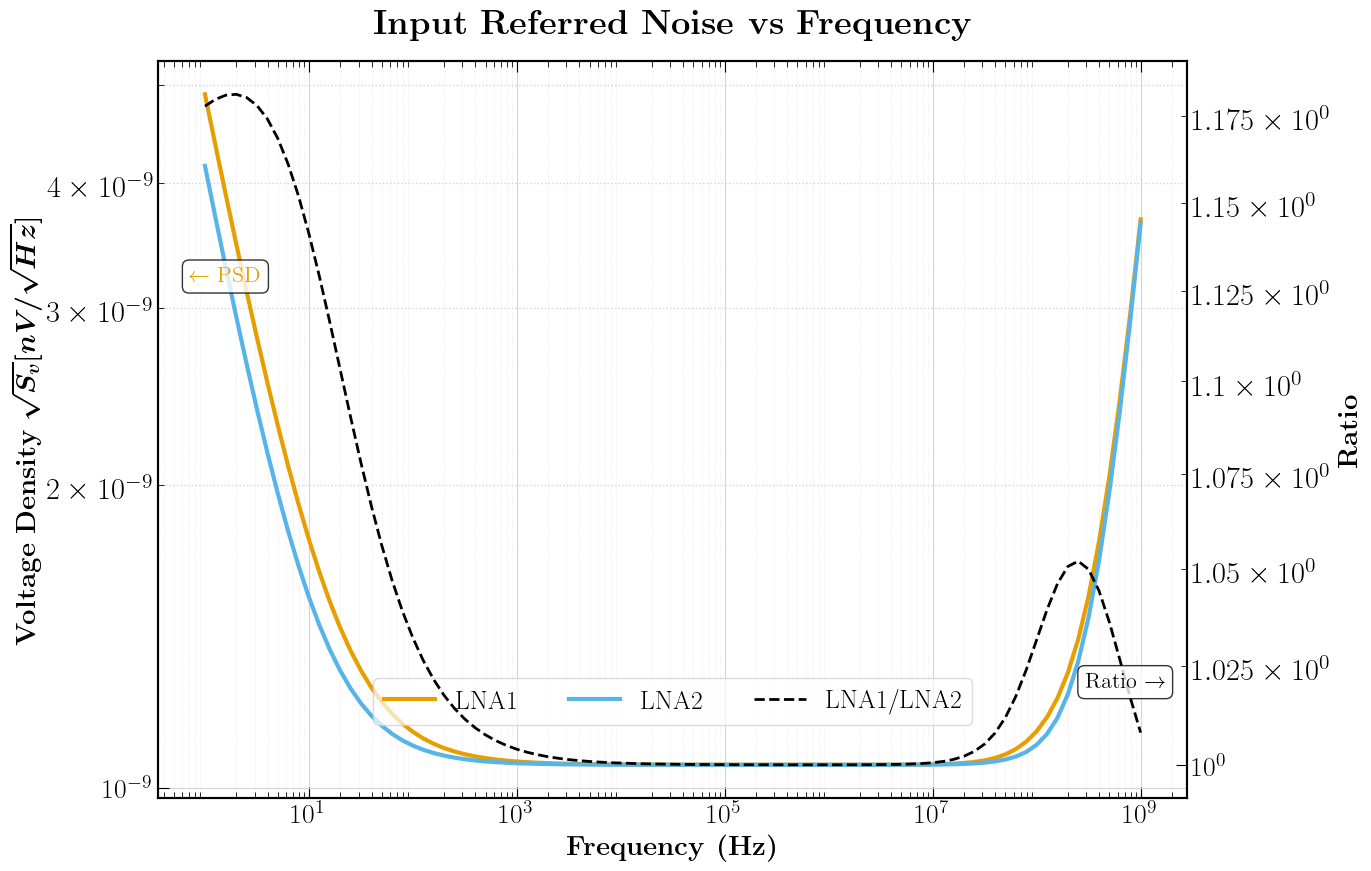

In [4]:

# --- 2. Plot Setup ---
fig, ax_left = plt.subplots(figsize=(14, 9))

# Create the Twin Axis sharing the X axis
ax_right = ax_left.twinx()

# --- 3. Plotting ---

# Plot Left Axis Data (Voltage Density)
# Note: We capture the plot objects (l1, l2) to use in the legend later
l1 = ax_left.loglog(input_noise['f'], input_noise['LNA1'], 
                    label='LNA1', color=colors[1], lw=3)
l2 = ax_left.loglog(input_noise['f'], input_noise['LNA2'], 
                    label='LNA2', color=colors[2], lw=3)

# Plot Right Axis Data (Ratio)
ratio_color = 'black'
l3 = ax_right.loglog(input_noise['f'], input_noise['LNA1']/input_noise['LNA2'], 
                     linestyle='--', label='LNA1/LNA2', color=ratio_color, lw=2)

# --- 4. Formatting ---

# Global Settings
plt.title(r'\textbf{Input Referred Noise vs Frequency}', fontsize=25, pad=20)
ax_left.grid(True, which='both', linestyle=':', linewidth=1, color='lightgray')
ax_left.set_xlabel(r'\textbf{Frequency (Hz)}', fontsize=20)

# Left Y-Axis Formatting
ax_left.set_ylabel(r'\textbf{Voltage Density} $\boldsymbol{\sqrt{S_v} [nV/ \sqrt{Hz}]}$', 
                   fontsize=20)
ax_left.tick_params(axis='both', which='major', labelsize=20)

# Right Y-Axis Formatting
ax_right.set_ylabel(r'\textbf{Ratio}', fontsize=20, color=ratio_color)
ax_right.tick_params(axis='y', labelsize=20, colors=ratio_color) # Color the ticks to match
ax_right.spines['right'].set_color(ratio_color) # Color the spine to match

# --- 5. The Combined Legend ---
# We gather handles (lines) and labels from both axes
lines = l1 + l2 + l3  # Combine the lists of lines
labels = [l.get_label() for l in lines] # Extract labels

# Create one legend on the main axis
ax_left.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 0.18),
               fancybox=True, shadow=False, ncol=3, fontsize=18.5,
               framealpha=0.7)

# --- 6. Annotations (Explicit visual cues) ---

# Annotation for Left Axis
ax_left.annotate(r'$\leftarrow$  PSD    ', xy=(0.03, 0.7), xycoords='axes fraction',
                 fontsize=16, fontweight='bold', color=colors[1],
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec='black', alpha=0.8))

# Annotation for Right Axis
ax_right.annotate(r'Ratio $\rightarrow$', xy=(0.9, 0.15), xycoords='axes fraction',
                  fontsize=16, fontweight='bold', color=ratio_color,
                  bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=ratio_color, alpha=0.8))

# 1. Define the Locator
# This tells matplotlib to place ticks at 2, 3, 4...9 for every decade
minor_locator = LogLocator(base=10.0, subs=(0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9), numticks=12)

# 2. Apply it to the X-Axis
ax_left.xaxis.set_minor_locator(minor_locator)

# 3. Draw the Grids
ax_left.grid(True, which='major', linestyle='-', linewidth=0.8, color='lightgray')
ax_left.grid(True, which='minor', axis='x', linestyle=':', linewidth=0.5, color='lightgray', alpha=0.7)

plt.tight_layout()
plt.savefig(f"{plot_dir}/Input_Referred_Noise.png", dpi=300)
plt.show()


### Input noise MC 

In [5]:
#noise at 27 deg C
noise_LNA1 = pd.read_csv(f"{dir}/Noise_MC_LNA1_27degC.csv")
noise_LNA2 = pd.read_csv(f"{dir}/Noise_MC_LNA2_27degC.csv")

#noise at 45 deg C 
noise_LNA1_45 = pd.read_csv(f"{dir}/Noise_MC_LNA1_45degC.csv")
noise_LNA2_45 = pd.read_csv(f"{dir}/Noise_MC_LNA2_45degC.csv")


In [6]:
np.size(noise_LNA1,axis = 0)
# noise_LNA1.head()

Vcm = [-0.5,0,0.5]  # For Vcm = -0.5, 0.0 and 0.5 V
num_sim = int((np.size(noise_LNA2, axis = 1)-4)/len(Vcm))  # Number of MC simulation for each Vcm
col1 = ['f']
col2 = ['f']
for i in Vcm: 
    for j in range(num_sim):
        col1.append(f'LNA1_Vcm{str(i)}_MC{j+1}')
        col2.append(f'LNA2_Vcm{str(i)}_MC{j+1}')
#append data for 45 deg C first since no current data there
noise_LNA1_45.columns = col1
noise_LNA2_45.columns = col2
noise_LNA1_45 = noise_LNA1_45.apply(pd.to_numeric, errors='coerce')
noise_LNA2_45 = noise_LNA2_45.apply(pd.to_numeric, errors='coerce')
#col for the current 
col1.append('MCnumber')
col2.append('MCnumber')

for i in Vcm:
    col1.append(f'i_LNA1_Vcm{i}_MC')
    col2.append(f'i_LNA1_Vcm{i}_MC')
noise_LNA1.columns = col1
noise_LNA2.columns = col2   
noise_LNA1 = noise_LNA1.apply(pd.to_numeric, errors='coerce')
noise_LNA2 = noise_LNA2.apply(pd.to_numeric, errors='coerce')
# noise_LNA1.head()
#calculate real noise 
for i in Vcm:
    for j in range(num_sim):
        noise_LNA1[f'Real_LNA1_Vcm{str(i)}_MC{j+1}'] = (noise_LNA1[f'LNA1_Vcm{str(i)}_MC{j+1}']**2 - (noise_LNA1[f'i_LNA1_Vcm{i}_MC']**2 * 100**2))**0.5
        noise_LNA2[f'Real_LNA2_Vcm{str(i)}_MC{j+1}'] = (noise_LNA2[f'LNA2_Vcm{str(i)}_MC{j+1}']**2 - (noise_LNA2[f'i_LNA1_Vcm{i}_MC']**2 * 100**2))**0.5

In [7]:
print(noise_LNA1['Real_LNA1_Vcm0_MC1'])

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
86   NaN
87   NaN
88   NaN
89   NaN
90   NaN
Name: Real_LNA1_Vcm0_MC1, Length: 91, dtype: float64


In [8]:
# --- 1. SETUP: Define your frequencies here ---
# You can put as many as you want in this list
target_freqs = [1, 10e3, 100e3]  # e.g., 1kHz, 10kHz, 100kHz

# Organize data
LNA = {'LNA1': noise_LNA1, 'LNA2': noise_LNA2}

# --- 2. PRE-CALCULATION: Find indices for all frequencies ---
# We assume both DataFrames share the same frequency vector.
# We create a list of tuples: (target_freq, actual_index, actual_freq_value)
freq_points = []
ref_freq_col = noise_LNA1['f'] # Reference column
print("------- T = 27 deg C -------")
print("--- Frequency Check ---")
for f_target in target_freqs:
    # Find index of closest frequency
    idx = (np.abs(ref_freq_col - f_target)).argmin()
    actual_f = ref_freq_col.iloc[idx]
    freq_points.append( (f_target, idx, actual_f) )
    print(f"Target: {f_target:.0f} Hz -> Found: {actual_f:.2f} Hz (Index: {idx})")
print("-----------------------\n")

# --- 3. MAIN LOOP ---
# Iterate through each LNA DataFrame
for lna_name, df in LNA.items(): 
    print(f"RESULTS FOR {lna_name}")
    print("=" * 30)
    
    for i in Vcm:
        print(f'>> Vcm = {i} V')
        
        # Filter columns dynamically based on the current LNA name and Vcm
        # Note: We use 'df' here, not 'noise_LNA1', so it works for LNA2 too
        subset = df.filter(like=f'{lna_name}_Vcm{i}_MC')
        
        # Force numeric conversion to prevent string errors
        subset = subset.apply(pd.to_numeric, errors='coerce')

        # Calculate the statistic curves (entire frequency range)
        avg_curve = subset.mean(axis=1)
        max_curve = subset.max(axis=1)
        min_curve = subset.min(axis=1)
        
        # Extract specific points for our target frequencies
        # We allow for a small header row to make it readable
        print(f"{'Freq (Hz)':<12} {'Avg (nV)':<12} {'Min (nV)':<12} {'Max (nV)':<12}")
        print("-" * 50)
        
        for f_target, idx, f_actual in freq_points:
            # Scale to nV (1e9) for display
            avg_val = avg_curve.iloc[idx] * 1e9
            max_val = max_curve.iloc[idx] * 1e9
            min_val = min_curve.iloc[idx] * 1e9
            
            print(f"{f_actual:<12.1f} {avg_val:<12.2f} {min_val:<12.2f} {max_val:<12.2f}")
        
        print("") # Empty line between Vcm groups
    print("\n") # Empty line between LNA groups

------- T = 27 deg C -------
--- Frequency Check ---
Target: 1 Hz -> Found: 1.00 Hz (Index: 0)
Target: 10000 Hz -> Found: 10000.00 Hz (Index: 40)
Target: 100000 Hz -> Found: 100000.00 Hz (Index: 50)
-----------------------

RESULTS FOR LNA1
>> Vcm = -0.5 V
Freq (Hz)    Avg (nV)     Min (nV)     Max (nV)    
--------------------------------------------------
1.0          11.07        4.12         26.90       
10000.0      1.09         1.06         1.11        
100000.0     1.08         1.06         1.11        

>> Vcm = 0 V
Freq (Hz)    Avg (nV)     Min (nV)     Max (nV)    
--------------------------------------------------
1.0          11.09        4.16         26.96       
10000.0      1.08         1.06         1.11        
100000.0     1.08         1.06         1.11        

>> Vcm = 0.5 V
Freq (Hz)    Avg (nV)     Min (nV)     Max (nV)    
--------------------------------------------------
1.0          11.11        4.20         27.01       
10000.0      1.08         1.06         1

In [9]:
LNA = {'LNA1': noise_LNA1_45, 'LNA2': noise_LNA2_45}

# --- 2. PRE-CALCULATION: Find indices for all frequencies ---
# We assume both DataFrames share the same frequency vector.
# We create a list of tuples: (target_freq, actual_index, actual_freq_value)
freq_points = []
ref_freq_col = noise_LNA1['f'] # Reference column
print("------- T = 45 deg C -------")
print("--- Frequency Check ---")
for f_target in target_freqs:
    # Find index of closest frequency
    idx = (np.abs(ref_freq_col - f_target)).argmin()
    actual_f = ref_freq_col.iloc[idx]
    freq_points.append( (f_target, idx, actual_f) )
    print(f"Target: {f_target:.0f} Hz -> Found: {actual_f:.2f} Hz (Index: {idx})")
print("-----------------------\n")

# --- 3. MAIN LOOP ---
# Iterate through each LNA DataFrame
for lna_name, df in LNA.items(): 
    print(f"RESULTS FOR {lna_name}")
    print("=" * 30)
    
    for i in Vcm:
        print(f'>> Vcm = {i} V')
        
        # Filter columns dynamically based on the current LNA name and Vcm
        # Note: We use 'df' here, not 'noise_LNA1', so it works for LNA2 too
        subset = df.filter(like=f'{lna_name}_Vcm{i}_MC')
        
        # Force numeric conversion to prevent string errors
        subset = subset.apply(pd.to_numeric, errors='coerce')

        # Calculate the statistic curves (entire frequency range)
        avg_curve = subset.mean(axis=1)
        max_curve = subset.max(axis=1)
        min_curve = subset.min(axis=1)
        
        # Extract specific points for our target frequencies
        # We allow for a small header row to make it readable
        print(f"{'Freq (Hz)':<12} {'Avg (nV)':<12} {'Min (nV)':<12} {'Max (nV)':<12}")
        print("-" * 50)
        
        for f_target, idx, f_actual in freq_points:
            # Scale to nV (1e9) for display
            avg_val = avg_curve.iloc[idx] * 1e9
            max_val = max_curve.iloc[idx] * 1e9
            min_val = min_curve.iloc[idx] * 1e9
            
            print(f"{f_actual:<12.1f} {avg_val:<12.2f} {min_val:<12.2f} {max_val:<12.2f}")
        
        print("") # Empty line between Vcm groups
    print("\n") # Empty line between LNA groups

------- T = 45 deg C -------
--- Frequency Check ---
Target: 1 Hz -> Found: 1.00 Hz (Index: 0)
Target: 10000 Hz -> Found: 10000.00 Hz (Index: 40)
Target: 100000 Hz -> Found: 100000.00 Hz (Index: 50)
-----------------------

RESULTS FOR LNA1
>> Vcm = -0.5 V
Freq (Hz)    Avg (nV)     Min (nV)     Max (nV)    
--------------------------------------------------
1.0          12.35        6.28         28.18       
10000.0      1.12         1.09         1.15        
100000.0     1.12         1.09         1.14        

>> Vcm = 0 V
Freq (Hz)    Avg (nV)     Min (nV)     Max (nV)    
--------------------------------------------------
1.0          12.37        6.28         28.24       
10000.0      1.12         1.09         1.14        
100000.0     1.11         1.09         1.14        

>> Vcm = 0.5 V
Freq (Hz)    Avg (nV)     Min (nV)     Max (nV)    
--------------------------------------------------
1.0          12.39        6.29         28.28       
10000.0      1.11         1.09         1

## Bode plot

In [10]:
col = ['f', 'mag1', 'mag2', 'phase1', 'phase2']
gain.columns = col

In [11]:

def fc_loc(series):
    # Calculate the target magnitude: Max magnitude - 3 dB
    target_mag = series.max() - 3
    # print(target_mag)
    # Calculate the absolute difference between the target magnitude and each point in the series.
    # The minimum of this Series will correspond to the point closest to the target magnitude.
    abs_diff = (series - target_mag).abs()
    # print(abs_diff)
    # Get the index (which represents the frequency) where the absolute difference is minimum.
    # This is the "Cutoff Frequency Location" (-3dB point).
    cutoff_freq = abs_diff.idxmin()
    # print(cutoff_freq)
    # Return the index value
    return cutoff_freq
# print(fc_loc((gain['mag1'])))
# print(fc_loc((gain['mag2'])))


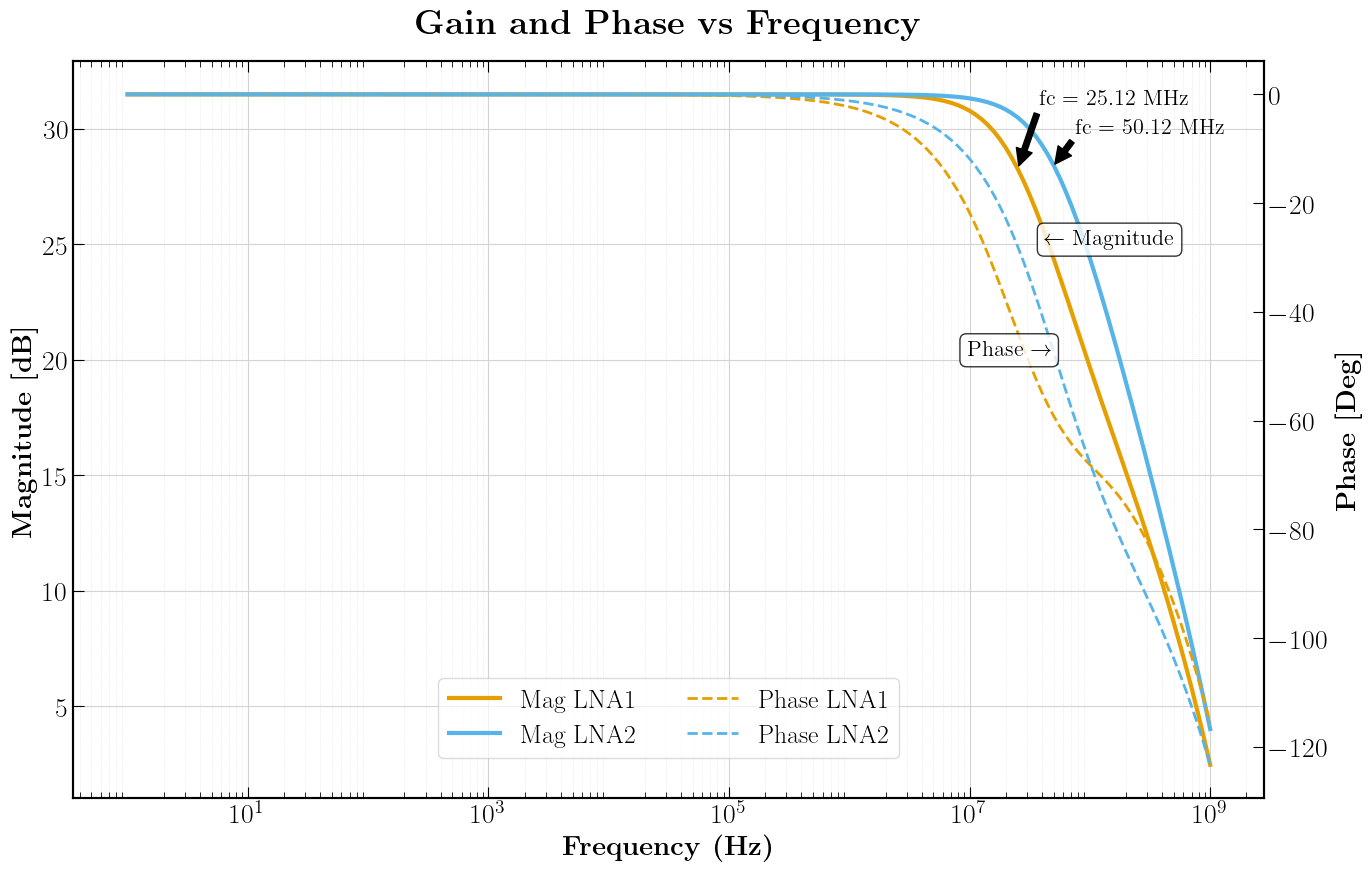

In [12]:


# --- 2. Plot Setup ---
fig, ax_left = plt.subplots(figsize=(14, 9))
ax_right = ax_left.twinx()

ratio_color = 'black'

# --- 3. Plotting ---
l1 = ax_left.semilogx(gain['f'], gain['mag1'], label='Mag LNA1', color=colors[1], lw=3)
l2 = ax_left.semilogx(gain['f'], gain['mag2'], label='Mag LNA2', color=colors[2], lw=3)

phase_style = '--'
l3 = ax_right.semilogx(gain['f'], gain['phase1'], label='Phase LNA1', color=colors[1], lw=2, linestyle=phase_style)
l4 = ax_right.semilogx(gain['f'], gain['phase2'], label='Phase LNA2', color=colors[2], lw=2, linestyle=phase_style)

# --- 4. Formatting ---
plt.title(r'\textbf{Gain and Phase vs Frequency}', fontsize=25, pad=20)

# 1. Define the Locator
# This tells matplotlib to place ticks at 2, 3, 4...9 for every decade
minor_locator = LogLocator(base=10.0, subs=(0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9), numticks=12)

# 2. Apply it to the X-Axis
ax_left.xaxis.set_minor_locator(minor_locator)

# 3. Draw the Grids
ax_left.grid(True, which='major', linestyle='-', linewidth=0.8, color='lightgray')
ax_left.grid(True, which='minor', axis='x', linestyle=':', linewidth=0.5, color='lightgray', alpha=0.7)

# =========================================================

ax_left.set_xlabel(r'\textbf{Frequency (Hz)}', fontsize=20)
ax_left.set_ylabel(r'\textbf{Magnitude [dB]}', fontsize=20)
ax_left.tick_params(axis='both', which='major', labelsize=20)

ax_right.set_ylabel(r'\textbf{Phase [Deg]}', fontsize=20, color=ratio_color)
ax_right.tick_params(axis='y', labelsize=20, colors=ratio_color)
ax_right.spines['right'].set_color(ratio_color)

# --- 5. Legend ---
lines = l1 + l2 + l3 + l4
labels = [l.get_label() for l in lines]

ax_left.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 0.18),
               fancybox=True, shadow=False, ncol=2, fontsize=18.5, framealpha=0.7)

# --- 6. Annotations ---
ax_left.annotate(r'$\leftarrow$ Magnitude', xy=(0.815, 0.75), xycoords='axes fraction',
                 fontsize=16, fontweight='bold', color='black',
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec='black', alpha=0.8))

ax_right.annotate(r'Phase $\rightarrow$', xy=(0.75, 0.6), xycoords='axes fraction',
                  fontsize=16, fontweight='bold', color=ratio_color,
                  bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=ratio_color, alpha=0.8))

# Annotate cutoff frequencies
fc1_loc = fc_loc(gain['mag1'])
fc2_loc = fc_loc(gain['mag2'])          
ax_left.annotate(f'fc = {np.round(gain['f'][fc1_loc]/1e6,2)} MHz', xy=(gain['f'][fc1_loc], gain['mag1'][fc1_loc]), xytext=(gain['f'][fc1_loc]*1.5, gain['mag1'][fc1_loc]*1.1),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax_left.annotate(f'fc = {np.round(gain['f'][fc2_loc]/1e6,2)} MHz', xy=(gain['f'][fc2_loc], gain['mag2'][fc2_loc]), xytext=(gain['f'][fc2_loc]*1.5, gain['mag2'][fc2_loc]*1.05),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )


plt.tight_layout()
plt.savefig(f"{plot_dir}/gain.png", dpi=300)
plt.show()

## Gain drift plot 

In [13]:
col = ['T', 'LNA1', 'LNA2']
drift.columns = col

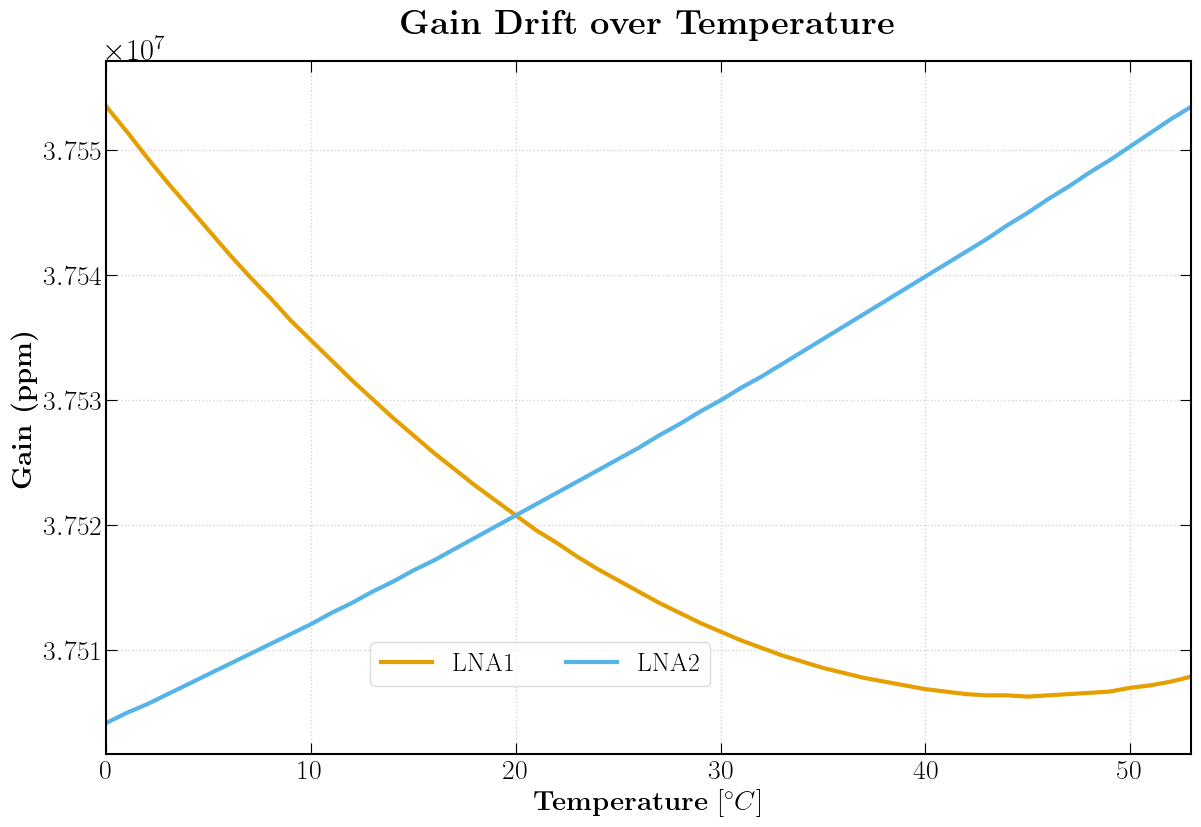

In [14]:
fix,ax = plt.subplots(figsize=(14, 9))
ax.plot(drift['T'], drift['LNA1']*1e6, label='LNA1', color=colors[1], lw=3)
ax.plot(drift['T'], drift['LNA2']*1e6, label='LNA2', color=colors[2], lw=3)
ax.set_title(r'\textbf{Gain Drift over Temperature}', fontsize=25, pad=20)
ax.set_xlabel(r'\textbf{Temperature} $[^{\circ} C]$', fontsize=20)
ax.set_ylabel(r'\textbf{Gain (ppm)}', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.grid(True, which='both', linestyle=':', linewidth=1, color='lightgray')
ax.legend(loc='upper center', bbox_to_anchor=(0.4, 0.18),
          fancybox=True, shadow=False, ncol=2, fontsize=18.5,
          framealpha=0.7)       
ax.set_xlim(0,53)   
plt.savefig(f"{plot_dir}/Gain_drift.png", dpi=300)                                                                                                                 

### Gain drift MC 

In [15]:
Gain_drift_MC1 = pd.read_csv(f"{dir}/gain_MC_LNA1_27degC.csv")
Gain_drift_MC2 = pd.read_csv(f"{dir}/gain_MC_LNA2_27degC.csv")
Gain_drift_MC2.head()

,temp (C),/voutdiff2 Vcm -0.5 mcparamset 1 (V),/voutdiff2 Vcm -0.5 mcparamset 2 (V),/voutdiff2 Vcm -0.5 mcparamset 3 (V),/voutdiff2 Vcm -0.5 mcparamset 4 (V),/voutdiff2 Vcm -0.5 mcparamset 5 (V),/voutdiff2 Vcm -0.5 mcparamset 6 (V),/voutdiff2 Vcm -0.5 mcparamset 7 (V),/voutdiff2 Vcm -0.5 mcparamset 8 (V),/voutdiff2 Vcm -0.5 mcparamset 9 (V),...,/voutdiff2 Vcm 0.5 mcparamset 11 (V),/voutdiff2 Vcm 0.5 mcparamset 12 (V),/voutdiff2 Vcm 0.5 mcparamset 13 (V),/voutdiff2 Vcm 0.5 mcparamset 14 (V),/voutdiff2 Vcm 0.5 mcparamset 15 (V),/voutdiff2 Vcm 0.5 mcparamset 16 (V),/voutdiff2 Vcm 0.5 mcparamset 17 (V),/voutdiff2 Vcm 0.5 mcparamset 18 (V),/voutdiff2 Vcm 0.5 mcparamset 19 (V),/voutdiff2 Vcm 0.5 mcparamset 20 (V)
0,0.0,34.5576,35.3537,34.3546,35.4693,36.1962,35.9938,34.5347,35.1428,35.5421,...,35.8654,35.7143,37.1406,36.5406,35.7300,36.5675,36.1045,36.2491,35.1688,35.9412
1,1.0,34.5609,35.3566,34.3558,35.4700,36.1958,35.9940,34.5366,35.1428,35.5427,...,35.8673,35.7172,37.1390,36.5410,35.7291,36.5688,36.1051,36.2517,35.1705,35.9404
2,2.0,34.5642,35.3594,34.3570,35.4706,36.1955,35.9942,34.5385,35.1428,35.5432,...,35.8692,35.7201,37.1374,36.5414,35.7282,36.5702,36.1057,36.2542,35.1721,35.9395
3,3.0,34.5675,35.3623,34.3582,35.4713,36.1952,35.9945,34.5404,35.1428,35.5438,...,35.8710,35.7230,37.1359,36.5418,35.7273,36.5715,36.1063,36.2568,35.1738,35.9387
4,4.0,34.5708,35.3651,34.3595,35.4719,36.1949,35.9947,34.5423,35.1428,35.5444,...,35.8729,35.7259,37.1344,36.5422,35.7265,36.5729,36.1069,36.2593,35.1754,35.9379


In [16]:
np.size(Gain_drift_MC1,axis = 0)
# noise_LNA1.head()

Vcm = [-0.5,0,0.5]  # For Vcm = -0.5, 0.0 and 0.5 V
num_sim = int((np.size(Gain_drift_MC1, axis = 1))/len(Vcm))  # Number of MC simulation for each Vcm
col1 = ['T']
col2 = ['T']
for i in Vcm: 
    for j in range(num_sim):
        col1.append(f'LNA1_Vcm{str(i)}_MC{j+1}')
        col2.append(f'LNA2_Vcm{str(i)}_MC{j+1}')
Gain_drift_MC1.columns = col1
Gain_drift_MC2.columns = col2
Gain_drift_MC2.head()

,T,LNA2_Vcm-0.5_MC1,LNA2_Vcm-0.5_MC2,LNA2_Vcm-0.5_MC3,LNA2_Vcm-0.5_MC4,LNA2_Vcm-0.5_MC5,LNA2_Vcm-0.5_MC6,LNA2_Vcm-0.5_MC7,LNA2_Vcm-0.5_MC8,LNA2_Vcm-0.5_MC9,...,LNA2_Vcm0.5_MC11,LNA2_Vcm0.5_MC12,LNA2_Vcm0.5_MC13,LNA2_Vcm0.5_MC14,LNA2_Vcm0.5_MC15,LNA2_Vcm0.5_MC16,LNA2_Vcm0.5_MC17,LNA2_Vcm0.5_MC18,LNA2_Vcm0.5_MC19,LNA2_Vcm0.5_MC20
0,0.0,34.5576,35.3537,34.3546,35.4693,36.1962,35.9938,34.5347,35.1428,35.5421,...,35.8654,35.7143,37.1406,36.5406,35.7300,36.5675,36.1045,36.2491,35.1688,35.9412
1,1.0,34.5609,35.3566,34.3558,35.4700,36.1958,35.9940,34.5366,35.1428,35.5427,...,35.8673,35.7172,37.1390,36.5410,35.7291,36.5688,36.1051,36.2517,35.1705,35.9404
2,2.0,34.5642,35.3594,34.3570,35.4706,36.1955,35.9942,34.5385,35.1428,35.5432,...,35.8692,35.7201,37.1374,36.5414,35.7282,36.5702,36.1057,36.2542,35.1721,35.9395
3,3.0,34.5675,35.3623,34.3582,35.4713,36.1952,35.9945,34.5404,35.1428,35.5438,...,35.8710,35.7230,37.1359,36.5418,35.7273,36.5715,36.1063,36.2568,35.1738,35.9387
4,4.0,34.5708,35.3651,34.3595,35.4719,36.1949,35.9947,34.5423,35.1428,35.5444,...,35.8729,35.7259,37.1344,36.5422,35.7265,36.5729,36.1069,36.2593,35.1754,35.9379


Offsets for LNA1: [46, 41, 46, 10, 54, 13, 7, 27, 40, 2, 47, 43, 48, 11, 13, 9, 29, 41, 3, 51, 46, 52, 14, 16, 10, 32, 44, 7]


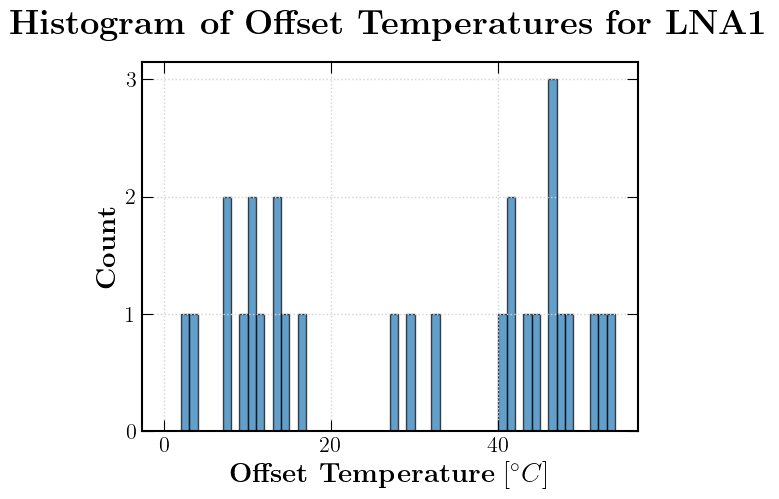

In [17]:
#find the offset zero 
offset = []
for i in Vcm:               
    for j in range(num_sim):
        signs = np.sign(np.gradient(Gain_drift_MC1[f'LNA1_Vcm{str(i)}_MC{j+1}'], Gain_drift_MC1['T']))
        change_indices = np.where(np.diff(signs))[0]
        change_temps = Gain_drift_MC1['T'].iloc[change_indices + 1]  # +1 due to diff reducing the array size by 1
        if np.size(change_temps) > 0:
            offset.append(int(change_temps.iloc[0]))
        # print("Temperatures where gain drift derivative changes sign for LNA1 Vcm=0V:")
print("Offsets for LNA1:", offset)  

plt.hist(offset, bins=range(0, 55, 1), edgecolor='black', alpha=0.7)
plt.title(r'\textbf{Histogram of Offset Temperatures for LNA1}', fontsize=25, pad=20)
plt.xlabel(r'\textbf{Offset Temperature} $[^{\circ} C]$', fontsize=20)
plt.ylabel(r'\textbf{Count}', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, which='both', linestyle=':', linewidth=1, color='lightgray')
# plt.savefig(f"{plot_dir}/Offset_Temperature_LNA1.png", dpi=300)
plt.show()  

Offsets for LNA1: [20, 4, 49, 24, 1, 54, 31, 8]


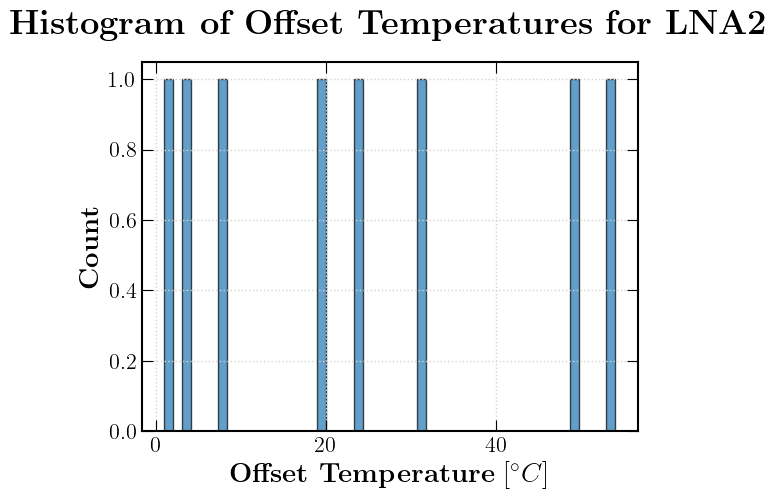

In [163]:
offset = []
for i in Vcm:               
    for j in range(num_sim):
        signs = np.sign(np.gradient(Gain_drift_MC2[f'LNA2_Vcm{str(i)}_MC{j+1}'], Gain_drift_MC2['T']))
        change_indices = np.where(np.diff(signs))[0]
        change_temps = Gain_drift_MC2['T'].iloc[change_indices + 1]  # +1 due to diff reducing the array size by 1
        if np.size(change_temps) > 0:
            offset.append(int(change_temps.iloc[0]))
        # print("Temperatures where gain drift derivative changes sign for LNA1 Vcm=0V:")
print("Offsets for LNA1:", offset)  

plt.hist(offset, bins=50, edgecolor='black', alpha=0.7)
plt.title(r'\textbf{Histogram of Offset Temperatures for LNA2}', fontsize=25, pad=20)
plt.xlabel(r'\textbf{Offset Temperature} $[^{\circ} C]$', fontsize=20)
plt.ylabel(r'\textbf{Count}', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, which='both', linestyle=':', linewidth=1, color='lightgray')
# plt.savefig(f"{plot_dir}/Offset_Temperature_LNA1.png", dpi=300)
plt.show()  

## Signal response

In [131]:
response = pd.read_csv(f"{dir}/slew_rate.csv")
vin = pd.read_csv(f"{dir}/slew_rate_vin.csv")
np.size(response,axis = 0)
vin = vin.apply(pd.to_numeric, errors='coerce')[0:145]
vin.head()

,time (s),/vindiff1 (V)
0,0.000000e+00,-0.014912
1,4.000000e-09,-0.014912
2,1.200000e-08,-0.014912
3,2.800000e-08,-0.014912
4,6.000000e-08,-0.014912


In [170]:
def signal_cv_file(df,slice_start,slice_end):
    time = df.filter(like='time (s)', axis=1)
    sig = df.filter(like='/voutdiff', axis=1)
    temp = np.arange(-40,81,1)
    col_time = []
    col_sig = []
    for i in range(np.size(sig,axis =1 )):
        col_time.append(f't_T{str(temp[i])}')
        col_sig.append(f'v_T{str(temp[i])}')
    time.columns = col_time
    sig.columns = col_sig
    time = time.apply(pd.to_numeric, errors='coerce')[slice_start:slice_end]
    sig = sig.apply(pd.to_numeric, errors='coerce')[slice_start:slice_end]
    return time,sig

time,sig = signal_cv_file(pd.read_csv(f"{dir}/slew_rate_LNA2.csv"),0,145)
time2,sig2 = signal_cv_file(response,0,145)

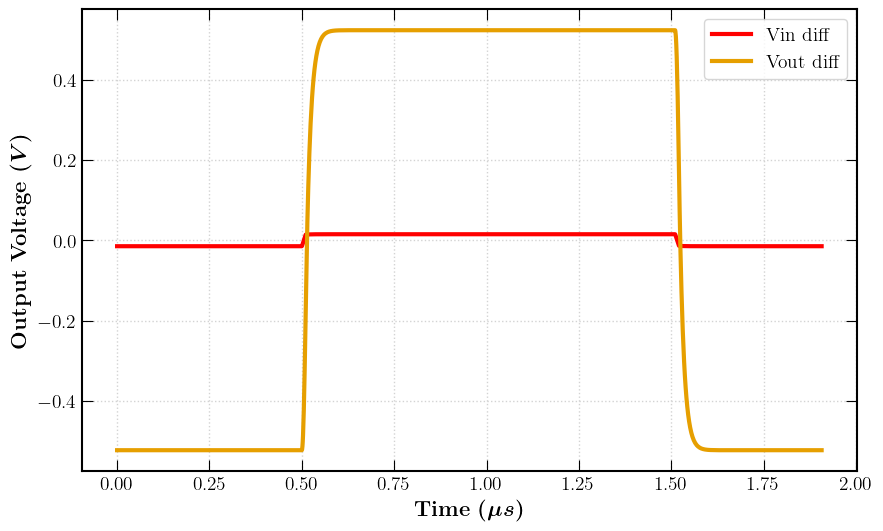

In [134]:
# Show the example plot for T = 27 deg C
T_index = 67  # Index for T = 27 deg C in the temp array
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(vin['time (s)']*1e6, vin['/vindiff1 (V)'], color='red', lw=3, label='Vin diff')
ax.plot(time[f't_T{str(temp[T_index])}']*1e6, sig[f'v_T{str(temp[T_index])}'], color=colors[1], lw=3, label = 'Vout diff')
ax.set_xlabel(r'\textbf{Time} $\boldsymbol{(\mu s)}$', fontsize=16)
ax.set_ylabel(r'\textbf{Output Voltage} $\boldsymbol{(V)}$', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.grid(True, which='both', linestyle=':', linewidth=1, color='lightgray')
plt.legend(fontsize=14, loc = 'upper right')
plt.savefig(f"{plot_dir}/Output_Response_27degC.png", dpi=300)
plt.show()

In [171]:
#Selected range for slew rate calculation
cut = np.array(np.arange(10,80,1))
def slew_rate(time_df, sig_df, cut_indices):
    # --- Settings ---
    upper_lim = 0.9  # 80%
    lower_lim = 0.1  # 15%
    slew_results = []
    rise_results = []
    # Initialize variables for plotting later (stores the last iteration's data)
    debug_t_seg = None
    debug_v_seg = None
    p1 = None # Point 1 (time, voltage)
    p2 = None # Point 2 (time, voltage)

    # --- Calculation Loop ---
    # range(len(sig_df.columns)) ensures we iterate correctly even if column names differ
    for i in range(len(sig_df.columns)):
        
        # 1. Extract the segment as a Series (Voltage and Time)
        v_seg = sig_df.iloc[cut_indices, i]
        t_seg = time_df.iloc[cut_indices, i]
        
        # 2. Dynamic Swing Calculation (More robust than hardcoding 2*max)
        #    This finds the actual Top and Bottom of the signal in this window
        v_high_peak = v_seg.max()
        v_low_peak = v_seg.min()
        full_swing = v_high_peak - v_low_peak
        
        # 3. Define Threshold Voltages
        v_target_low = v_low_peak + (lower_lim * full_swing)
        v_target_high = v_low_peak + (upper_lim * full_swing)
        
        # 4. Find the index CLOSEST to these target voltages
        #    We use np.abs().argmin() to find the index within the segment
        idx_low = (np.abs(v_seg - v_target_low)).argmin()
        idx_high = (np.abs(v_seg - v_target_high)).argmin()
        
        # 5. Get the actual Time and Voltage at those indices
        t1 = t_seg.iloc[idx_low]
        v1 = v_seg.iloc[idx_low]
        
        t2 = t_seg.iloc[idx_high]
        v2 = v_seg.iloc[idx_high]
        
        # 6. Calculate Slew Rate (dV / dt)
        sr = (v2 - v1) / (t2 - t1) / 1e6 # Result in V/us
        slew_results.append(sr)
        rise_results.append(1e6 * (t2 - t1)) # Rise time in us
        # Save data for the debug plot (overwrites until the last loop)
        debug_t_seg = t_seg
        debug_v_seg = v_seg
        p1 = (t1, v1)
        p2 = (t2, v2)

    # # --- PLOTTING TEST SECTION (Outside the loop) ---
    # # This plots only the LAST column processed, serving as a sanity check
    # plt.figure(figsize=(10,6))
    # plt.title(fr"Slew Rate Calculate ($10\%-90\%$) Example", fontsize=16)
    
    # # 1. Plot the Cut Region
    # plt.plot(debug_t_seg, debug_v_seg, 'b.-', label='Signal Segment', alpha=0.6)
    
    # # 2. Plot the Calculation Points
    # plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'ro', markersize=8)
    
    # # 3. Draw the Slope Line
    # plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'r--', linewidth=2, label='Measured Slope')
    
    # plt.xlabel('Time (s)')
    # plt.ylabel('Voltage (V)')
    # plt.grid(True)
    # plt.legend()
    # plt.savefig(f"{plot_dir}/Slew_Rate_estimate.png", dpi=300)
    # plt.show()

    return slew_results, rise_results

# Call the function
sr_values, rt_values = slew_rate(time, sig, cut)
sr_values2, rt_values2 = slew_rate(time2, sig2, cut)
print(max(sr_values))
print(min(sr_values))
print(np.mean(sr_values))
# print(rt_values)
# print("Slew Rates calculated.")


40.248213504448
37.817516905101506
39.13188426414498


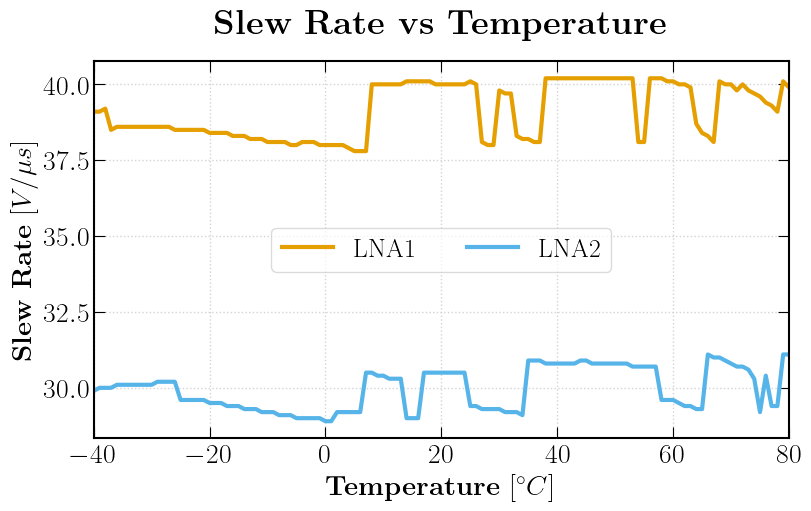

In [178]:
plt.figure(figsize=(8, 5), layout="constrained")
plt.plot(temp, np.round(sr_values,1), label='LNA1', color=colors[1], lw=3)
plt.plot(temp, np.round(sr_values2,1), label='LNA2', color=colors[2], lw=3)
plt.title(r'\textbf{Slew Rate vs Temperature}', fontsize=25, pad=20)
plt.xlabel(r'\textbf{Temperature} $[^{\circ} C]$', fontsize=20)
plt.ylabel(r'\textbf{Slew Rate} $[V/ \mu s]$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True, which='both', linestyle=':', linewidth=1, color='lightgray')
plt.legend(loc='center', bbox_to_anchor=(0.5, 0.5),
          fancybox=True, shadow=False, ncol=2, fontsize=18.5,
          framealpha=0.7)       
plt.xlim(-40,80)   
plt.savefig(f"{plot_dir}/Slew_rate.png", dpi=300)                                                                                                                 
plt.show()

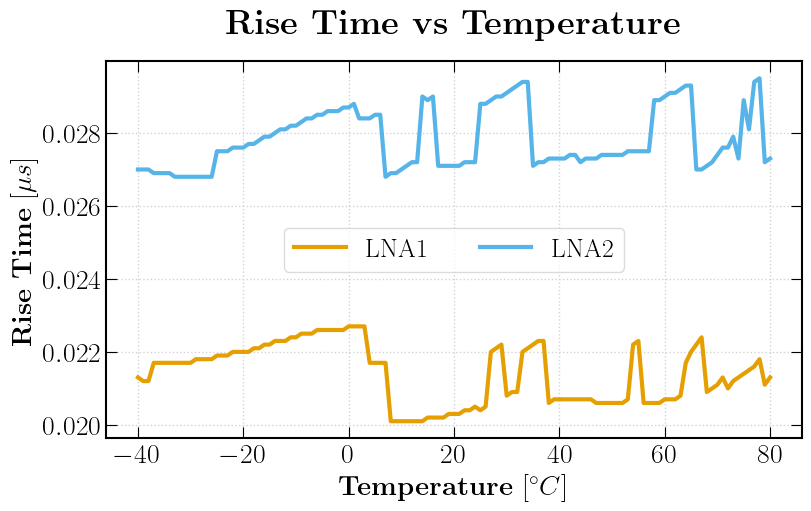

In [180]:
plt.figure(figsize=(8, 5), layout="constrained")
plt.plot(temp, np.round(rt_values,4), label='LNA1', color=colors[1], lw=3)
plt.plot(temp, np.round(rt_values2,4), label='LNA2', color=colors[2], lw=3)
plt.title(r'\textbf{Rise Time vs Temperature}', fontsize=25, pad=20)
plt.xlabel(r'\textbf{Temperature} $[^{\circ} C]$', fontsize=20)
plt.ylabel(r'\textbf{Rise Time} $[\mu s]$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True, which='both', linestyle=':', linewidth=1, color='lightgray')
plt.legend(loc='center', bbox_to_anchor=(0.5, 0.5),
          fancybox=True, shadow=False, ncol=2, fontsize=18.5,
          framealpha=0.7)       
# plt.xlim(-40,80)   
plt.savefig(f"{plot_dir}/Rise_time.png", dpi=300)                                                                                                                 
plt.show()

At 27 deg C Slew Rate (V/us)
--------------------------------------------------
LNA1:
 Avg (V/us) 29.921074210696364, Min (V/us) 28.13277454669865, Max (V/us) 31.70770404271551
LNA2:
 Avg (V/us) 38.9507165902638, Min (V/us) 36.448117497271824, Max (V/us) 42.33352826510727
--------------------------------------------------
At 45 deg C Slew Rate (V/us)
--------------------------------------------------
LNA1:
 Avg (V/us) 30.062479475180115, Min (V/us) 28.501738122827373, Max (V/us) 31.725018754688733
LNA2:
 Avg (V/us) 39.01292823132625, Min (V/us) 36.50154093528071, Max (V/us) 41.83191468545142
--------------------------------------------------





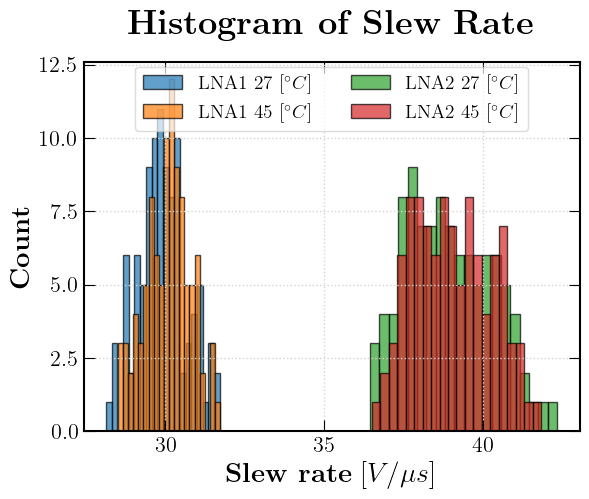

In [197]:
# Load MC slew rate data at 27 and 45 deg C for both LNAs
time27_LNA1,sig27_LNA1 = signal_cv_file(pd.read_csv(f"{dir}/slew_rate_MC_27degC.csv"),     0,145)
time45_LNA1,sig45_LNA1 = signal_cv_file(pd.read_csv(f"{dir}/slew_rate_MC_45degC.csv"),     0,145)
time27_LNA2,sig27_LNA2 = signal_cv_file(pd.read_csv(f"{dir}/slew_rate_MC_27degC_LNA2.csv"),0,145)
time45_LNA2,sig45_LNA2 = signal_cv_file(pd.read_csv(f"{dir}/slew_rate_MC_45degC_LNA2.csv"),0,145)

sr27_LNA1,rt27_LNA1 = slew_rate(time27_LNA1,sig27_LNA1,cut)
sr45_LNA1,rt45_LNA1 = slew_rate(time45_LNA1,sig45_LNA1,cut)
sr27_LNA2,rt27_LNA2 = slew_rate(time27_LNA2,sig27_LNA2,cut)
sr45_LNA2,rt45_LNA2 = slew_rate(time45_LNA2,sig45_LNA2,cut)


# sr_values_45, rt_values_45 = slew_rate(time, sig, cut)

print("At 27 deg C Slew Rate (V/us)")
print("-" * 50)
print(f"LNA1:")
print(f" Avg (V/us) {np.mean(sr27_LNA1)}, Min (V/us) {min(sr27_LNA1)}, Max (V/us) {max(sr27_LNA1)}")
print(f"LNA2:")
print(f" Avg (V/us) {np.mean(sr27_LNA2)}, Min (V/us) {min(sr27_LNA2)}, Max (V/us) {max(sr27_LNA2)}")
print("-" * 50)     

# print(f" Avg (V/us) {np.mean(sr_values_45)}, Min (V/us) {min(sr_values_45)}, Max (V/us) {max(sr_values_45)}")
# print("-" * 50)
print("At 45 deg C Slew Rate (V/us)")           
print("-" * 50)
print(f"LNA1:")
print(f" Avg (V/us) {np.mean(sr45_LNA1)}, Min (V/us) {min(sr45_LNA1)}, Max (V/us) {max(sr45_LNA1)}")
print(f"LNA2:")
print(f" Avg (V/us) {np.mean(sr45_LNA2)}, Min (V/us) {min(sr45_LNA2)}, Max (V/us) {max(sr45_LNA2)}")
print("-" * 50)     


print("") # Empty line between Vcm groups
print("\n") # Empty line between LNA groups
plt.hist(sr27_LNA1, bins=20, edgecolor='black', alpha=0.7, label=r'LNA1 27 $[^{\circ} C]$')
plt.hist(sr45_LNA1, bins=20, edgecolor='black', alpha=0.7, label=r'LNA1 45 $[^{\circ} C]$')
plt.hist(sr27_LNA2, bins=20, edgecolor='black', alpha=0.7, label=r'LNA2 27 $[^{\circ} C]$')
plt.hist(sr45_LNA2, bins=20, edgecolor='black', alpha=0.7, label=r'LNA2 45 $[^{\circ} C]$')

plt.title(r'\textbf{Histogram of Slew Rate }', fontsize=25, pad=20)
plt.xlabel(r'\textbf{Slew rate} $[V/\mu s]$', fontsize=20)
plt.ylabel(r'\textbf{Count}', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='center', bbox_to_anchor=(0.5, 0.9),
          fancybox=True, shadow=False, ncol=2, fontsize=14,
          framealpha=0.7)
plt.grid(True, which='both', linestyle=':', linewidth=1, color='lightgray')
plt.savefig(f"{plot_dir}/Hist_slew_rate.png", dpi=300)
plt.show()  